<a href="https://colab.research.google.com/github/ChardyBalla/Chardy/blob/main/02_IntroToPandas_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Pandas: Part 2 - Basic Steps in Analyzing Data

**Outline**:
- Basic Statistics and Visualizations
- Commonly Used Pandas Functions
- Merging and Concatenating Data Sets

**The following references were used to build this notebook's content:**
- *Bateman, B., Basak, S., Joseph, T., & So, W. (2022). The Pandas Workshop: A comprehensive guide to using Python for data analysis with real-world case studies. Packt Publishing Ltd.*
- *Stepanek, H. (2020). Thinking in Pandas. Apress.*
- *Molin, S. (2019). Hands-On Data Analysis with Pandas: Efficiently perform data collection, wrangling, analysis, and visualization using Python. Packt Publishing Ltd.*
- *Pandas Documentation. https://pandas.pydata.org/docs/index.html*

**Data set source:** https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import pandas as pd

Load data set used in the previous section.

In [18]:
df = pd.read_csv('/content/drive/MyDrive/Refocus Module/Jupyter Notebook-20230501T012835Z-001/Jupyter Notebook/datasets/hr_employee_attrition.csv',)
print(df.shape)
df.head()

(1470, 29)


,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,3,1,80,8,0,1,6,4,0,5
1,-49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,2,3,...,4,4,80,10,3,3,10,7,1,7
2,1,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,4,4,...,3,2,80,7,3,3,0,0,0,0
3,2,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,5,4,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,7,1,...,3,4,80,6,3,3,2,2,2,2


## Basic Statistics and Visualizations

To have an idea of what specific data preprocessing steps are needed, the following steps can serve as a guide to have a *big picture* of what is in the data set.

### 1. `.info()` and `.describe()` functions

The `.info()` function shows the features/columns in the data, the number of non-null values for each feature, and the data type of the values under each feature.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   DepartmentInCompany       1465 non-null   object 
 5   DistanceHome              1446 non-null   float64
 6   Education                 1470 non-null   int64  
 7   Educ                      1447 non-null   object 
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gend                      1470 non-null   object 
 11  JobRole                   1470 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1470 non-null   object 
 14  MonthlyI

The `.describe()` function shows some basic statistics in each column. Take note that the function shows different output for categorical and numerical features. Hence, it is better to use this function separately for categorical features and numerical features.

In [20]:
df.describe()

,Age,DailyRate,DistanceHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1.470000e+03,1446.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.706803,1.187493e+06,9.211618,2.912245,1024.858503,2.720408,2.731973,6464.646939,2.685714,15.201361,3.153741,2.713605,81.047619,11.231293,2.797959,2.757823,6.970748,4.834694,2.168027,4.098639
std,9.784563,4.517818e+07,8.109256,1.025103,602.022205,1.093358,1.100899,4682.914368,2.493668,3.661140,0.360824,1.080311,28.452086,7.766388,1.289058,0.708686,6.105257,19.352888,3.208173,3.550923
min,-59.000000,1.020000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.652500e+02,2.000000,2.000000,491.250000,2.000000,2.000000,2905.250000,1.000000,12.000000,3.000000,2.000000,80.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,8.020000e+02,7.000000,3.000000,1020.500000,3.000000,3.000000,4890.500000,2.000000,14.000000,3.000000,3.000000,80.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1.157750e+03,14.000000,4.000000,1555.750000,4.000000,4.000000,8260.250000,4.000000,18.000000,3.000000,4.000000,80.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.732123e+09,29.000000,5.000000,2068.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,900.000000,40.000000,6.000000,4.000000,40.000000,700.000000,15.000000,17.000000


Notice that if we use the `.describe()` function in a dataframe with both categorical and numerical features, only statistics of numerical features are shown.

In [15]:
# categorical features
cat_cols = ['BusinessTravel', 'DepartmentInCompany', 'Educ']
num_cols = ['Age', 'DailyRate']

Categorical features:

In [21]:
df[cat_cols].describe()

,BusinessTravel,DepartmentInCompany,Educ
count,1470,1465,1447
unique,6,4,8
top,Travel_Rarely,Research & Development,Life Sciences
freq,1034,953,592


In [22]:
df['Educ'].value_counts()

Life Sciences       592
Medical             456
Marketing           157
Technical Degree    131
Other                79
Human Resources      27
Medicall              3
Others                2
Name: Educ, dtype: int64

Numerical features:

In [23]:
df[num_cols].describe()

,Age,DailyRate
count,1470.000000,1.470000e+03
mean,36.706803,1.187493e+06
std,9.784563,4.517818e+07
min,-59.000000,1.020000e+02
25%,30.000000,4.652500e+02
50%,36.000000,8.020000e+02
75%,43.000000,1.157750e+03
max,60.000000,1.732123e+09


**TRY THIS!**
> Under the feature **JobRole**, which value has the highest frequency? Use the `.describe()` function to answer this.

In [24]:
# write your code here
df['JobRole'].describe().to_frame()

,JobRole
count,1470
unique,9
top,Sales Executive
freq,325


**TRY THIS!**
> Under the feature **YearsAtCompany**, what is the average value? Use the `.describe()` function to answer this.

In [25]:
# write your code here
df['YearsAtCompany'].describe().to_frame()

,YearsAtCompany
count,1470.000000
mean,6.970748
std,6.105257
min,0.000000
25%,3.000000
50%,5.000000
75%,9.000000
max,40.000000


### 2. Correlation Matrix

The **correlation matrix** shows the pairwise relationship of the features. This gives you an idea on which pair of features show a relationship that is worth exploring further.

Please use the table below as a guide on what the correlation coefficients mean. Note that this is not a universal standard.

![picture](https://drive.google.com/uc?export=view&id=1Vdw0ulNSLeTKLfVV1K-LW_GEQOiLg-77)

*Table Source: https://www.researchgate.net/publication/326140843_Adaptive_Optimized_Pattern_Extracting_Algorithm_for_Forecasting_Maximum_Electrical_Load_Duration_Using_Random_Sampling_and_Cumulative_Slope_Index/figures?lo=1&utm_source=google&utm_medium=organic*

In [26]:
df.corr()

<ipython-input-26-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,DailyRate,DistanceHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.028592,0.014596,0.204365,0.022961,-0.000287,0.014629,0.476079,0.278537,-0.016955,-0.030414,0.052329,-0.033080,0.636607,-0.020459,-0.014763,0.298680,0.029855,0.210949,0.199719
DailyRate,-0.028592,1.000000,0.051553,0.002431,-0.042339,-0.041020,0.006063,-0.023347,-0.017619,-0.022832,-0.011200,0.006968,-0.000968,-0.034555,-0.016127,-0.027846,-0.025676,-0.006547,-0.017647,-0.022885
DistanceHome,0.014596,0.051553,1.000000,0.019150,0.028400,-0.011160,-0.003269,-0.014841,-0.026875,0.044164,0.031479,0.016876,0.004564,0.007312,-0.030957,-0.025545,0.007193,0.071487,0.014895,0.006538
Education,0.204365,0.002431,0.019150,1.000000,0.041843,-0.024335,-0.010602,0.094439,0.122886,-0.009436,-0.024233,-0.013489,-0.051928,0.147824,-0.024760,0.003522,0.072139,0.014675,0.057683,0.074005
EmployeeNumber,0.022961,-0.042339,0.028400,0.041843,1.000000,0.017229,-0.045420,-0.017539,-0.002033,-0.013790,-0.020354,-0.069568,-0.060856,-0.016377,0.023187,0.008954,-0.013302,-0.055726,-0.011229,-0.011416
EnvironmentSatisfaction,-0.000287,-0.041020,-0.011160,-0.024335,0.017229,1.000000,-0.004049,-0.008869,0.013689,-0.030482,-0.029010,0.009389,-0.008522,-0.004404,-0.018856,0.025886,0.000916,0.011423,0.014567,-0.005867
JobSatisfaction,0.014629,0.006063,-0.003269,-0.010602,-0.045420,-0.004049,1.000000,-0.000907,-0.056494,0.021844,0.000984,-0.013073,-0.011024,-0.013445,-0.005566,-0.023923,0.000251,0.008239,-0.012489,-0.021268
MonthlyIncome,0.476079,-0.023347,-0.014841,0.094439,-0.017539,-0.008869,-0.000907,1.000000,0.150285,-0.024812,-0.013726,0.022026,-0.033931,0.771234,-0.021185,0.035028,0.513591,0.054549,0.341419,0.342857
NumCompaniesWorked,0.278537,-0.017619,-0.026875,0.122886,-0.002033,0.013689,-0.056494,0.150285,1.000000,-0.009542,-0.012840,0.051217,-0.017040,0.238907,-0.064875,-0.004578,-0.118960,0.022790,-0.033727,-0.111813
PercentSalaryHike,-0.016955,-0.022832,0.044164,-0.009436,-0.013790,-0.030482,0.021844,-0.024812,-0.009542,1.000000,0.774247,-0.041690,-0.028167,-0.018637,-0.004211,-0.004543,-0.034881,-0.017554,-0.019806,-0.011164


A correlation matrix can be presented using a *heatmap* for easier visualization.

<ipython-input-27-63ecbc3a4fc9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True) # set `annot=False` if you do not want the correlation coefficients to be shown


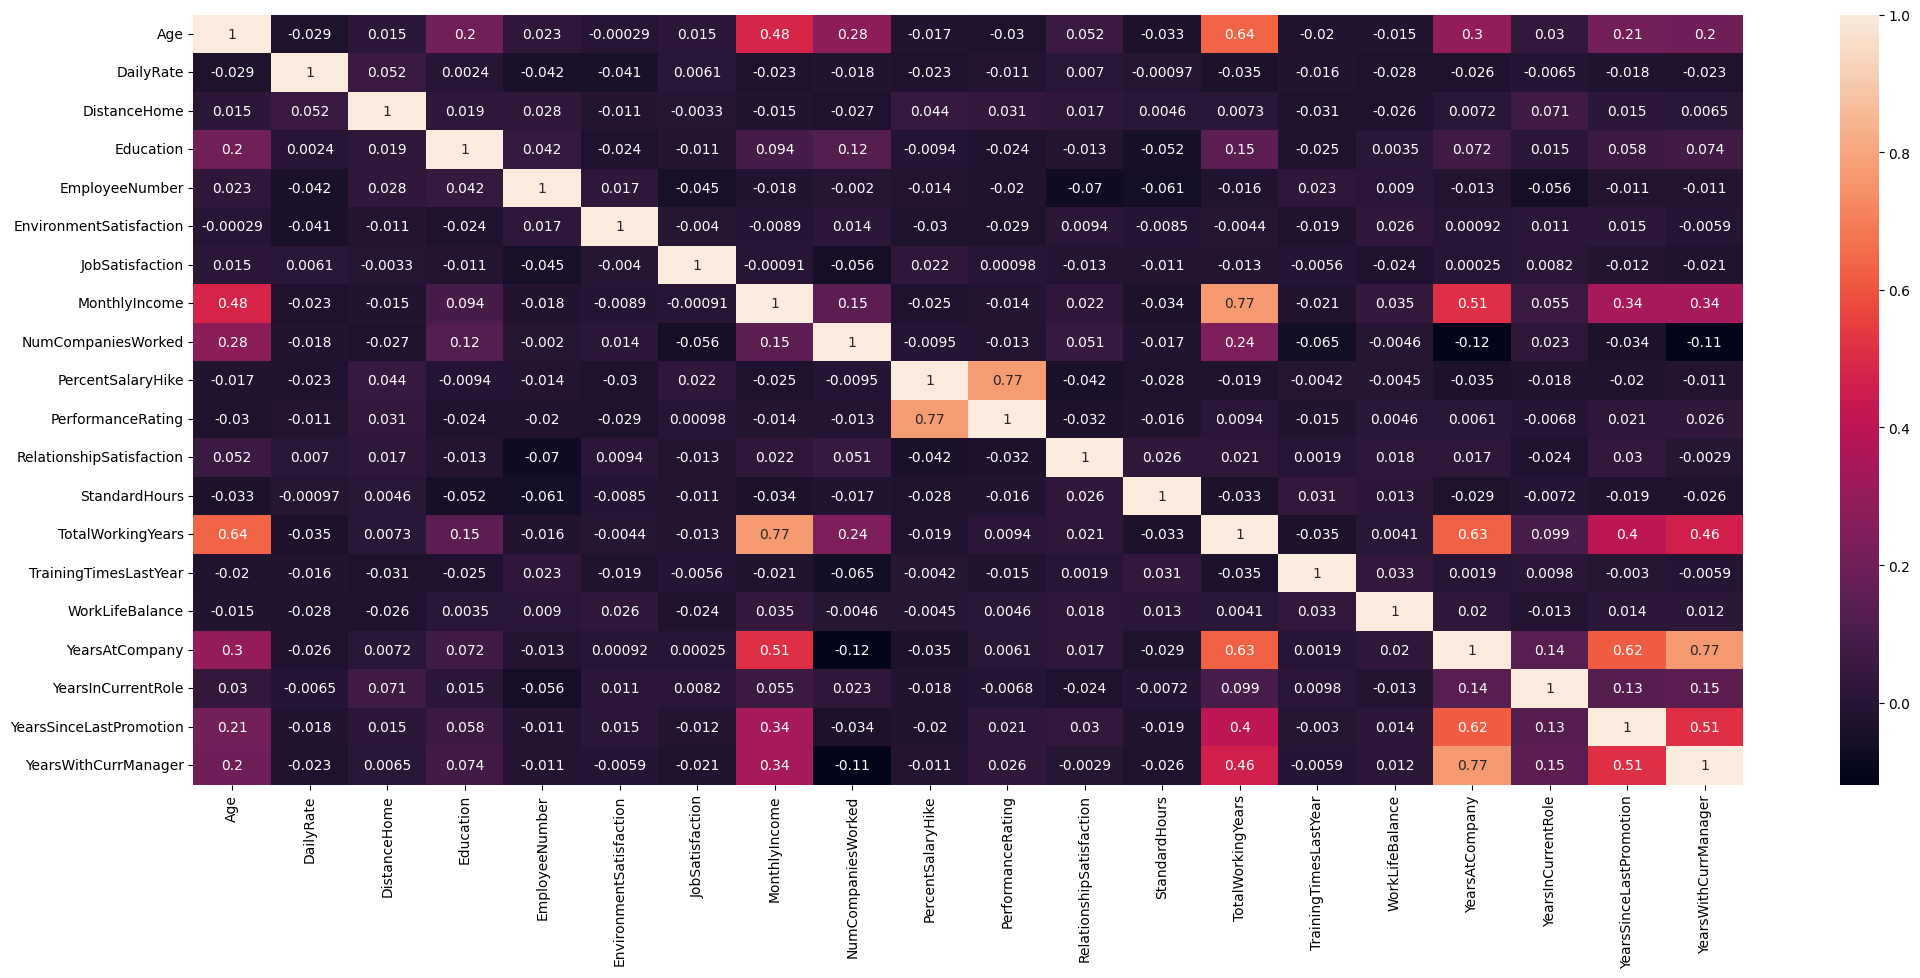

In [27]:
plt.figure(figsize=(25,10)) # adjust for bigger plot -- figsize=(width , height)
sns.heatmap(df.corr(), annot=True) # set `annot=False` if you do not want the correlation coefficients to be shown 
plt.show();

### 3. Countplot (categorical) and Histogram (numerical)

There are various graphs that can be used to visualize a set of observations. For a quick overview of the distribution of each set of observations, a **countplot** for categorical features and a **histogram** for numerical features can be a good start.

A **countplot** is simply a bar graph that shows the frequency/count of each distinct element under a certain categorical feature.

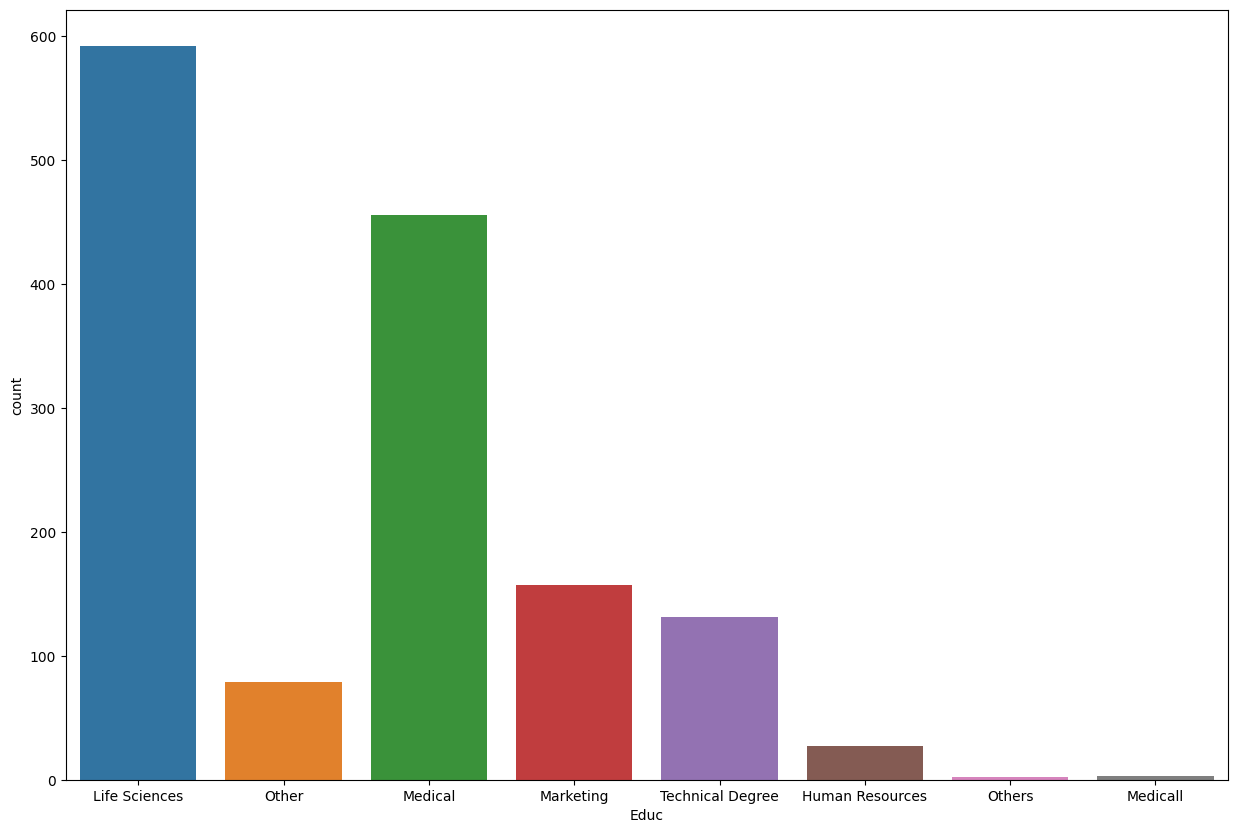

In [28]:
plt.figure(figsize=(15,10))

sns.countplot(x='Educ',
              data=df)


plt.show();

**TRY THIS!**
> Create a *countplot* for the feature **BusinessTravel**.

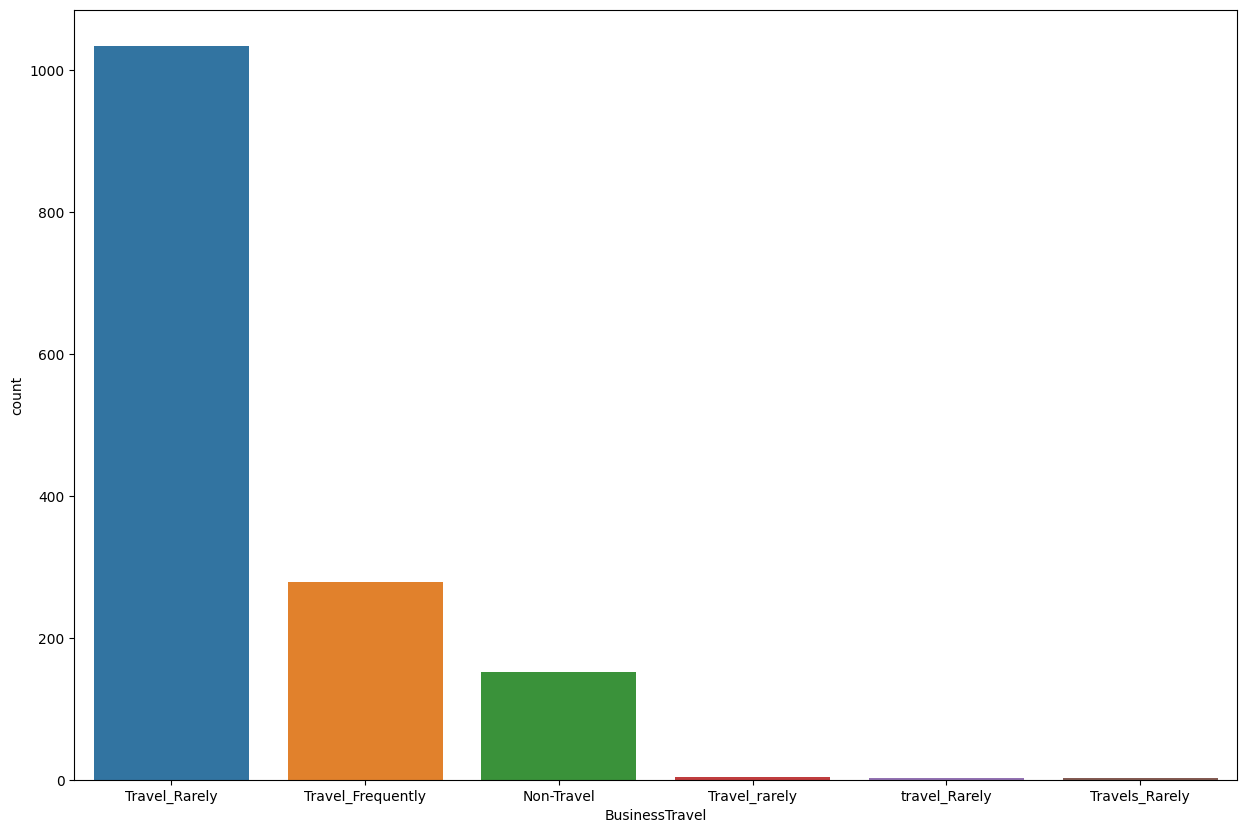

In [29]:
# write your code here
plt.figure(figsize=(15,10))

sns.countplot(x='BusinessTravel',
              data=df)

plt.show();

A **histogram** shows that frequency of values under a numerical feature that belongs to each range of values. 

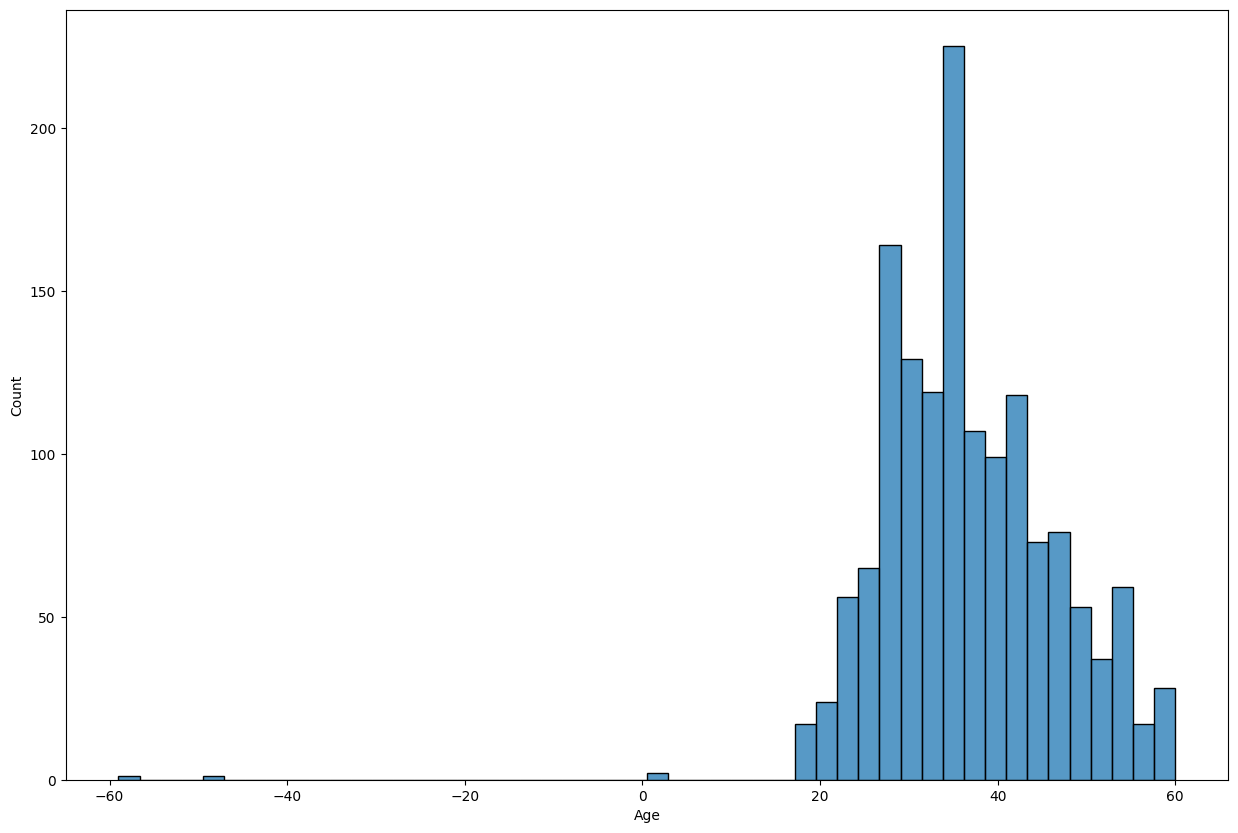

In [34]:
plt.figure(figsize=(15,10))

sns.histplot(x='Age',
             data=df,
             bins=50)

plt.show();

**TRY THIS!**
> Create a *histplot* for the feature **DistanceHome**.

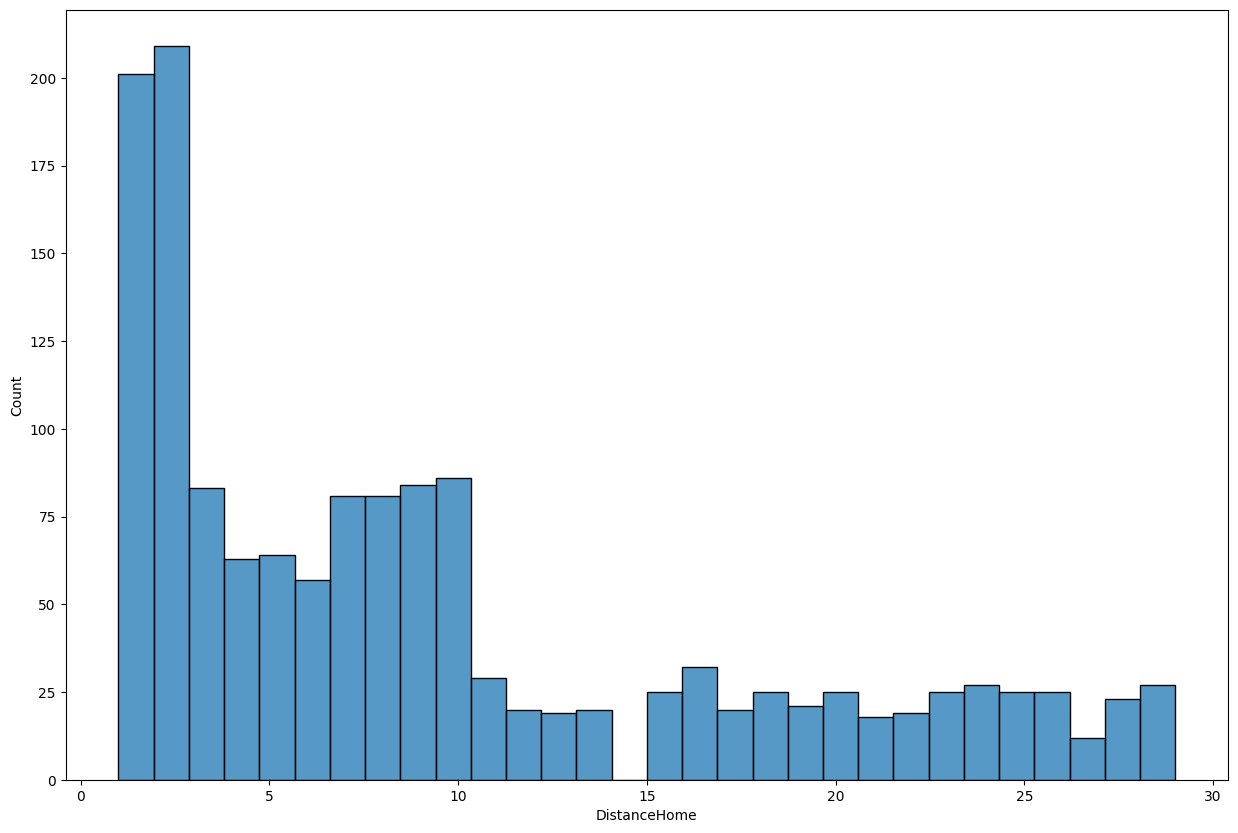

In [31]:
# write your code here
plt.figure(figsize=(15,10))

sns.histplot(
    x='DistanceHome',
    data=df,
    bins=30
)
plt.show()

### 4. `.groupby()` function

The `groupby()` function is used if you want to explore some statistics (count, average, median, etc.) of a set of values based on some grouping conditions (e.g. average salary by department, attrition count by gender). 

In [32]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,3,1,80,8,0,1,6,4,0,5
1,-49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,2,3,...,4,4,80,10,3,3,10,7,1,7
2,1,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,4,4,...,3,2,80,7,3,3,0,0,0,0
3,2,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,5,4,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,7,1,...,3,4,80,6,3,3,2,2,2,2


In [33]:
df.groupby('Attrition').agg('mean')

<ipython-input-33-374fdcefb3de>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Attrition').agg('mean')


,Age,DailyRate,DistanceHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,
No,37.324959,1.079062e+04,8.933278,2.924635,1027.759319,2.770665,2.781199,6787.541329,2.635332,15.219611,3.15316,2.734198,80.583468,11.804700,2.831442,2.775527,7.327391,5.029984,2.211507,4.342788
Yes,33.474576,7.340251e+06,10.668103,2.847458,1009.690678,2.457627,2.474576,4776.292373,2.949153,15.105932,3.15678,2.605932,83.474576,8.233051,2.622881,2.665254,5.105932,3.813559,1.940678,2.822034


In [35]:
df.groupby(['Attrition', 'DepartmentInCompany']).agg('mean')

<ipython-input-35-76052ab582ca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Attrition', 'DepartmentInCompany']).agg('mean')


Age     DailyRate  DistanceHome  \
Attrition DepartmentInCompany                                             
No        Human Resources         39.452830  7.434717e+02      7.603774   
          Research & Development  37.312195  1.583027e+04      8.996273   
          Sales                   37.172805  8.144986e+02      8.954023   
          none                    30.666667  1.190667e+03      9.333333   
Yes       Human Resources         30.083333  7.499167e+02     13.416667   
          Research & Development  33.203008  1.302423e+07     10.404580   
          Sales                   34.318681  7.480659e+02     10.685393   

                                  Education  EmployeeNumber  \
Attrition DepartmentInCompany                                 
No        Human Resources          3.000000     1186.584906   
          Research & Development   2.903659     1018.706098   
          Sales                    2.957507     1035.753541   
          none                     3.666667      546.000000   
Yes       Human Resources          3.000000     1280.916667   
          Research & Development   2.827068      949.744361   
          Sales                    2.857143     1061.538462   

                                  EnvironmentSatisfaction  JobSatisfaction  \
Attrition DepartmentInCompany                                                
No        Human Resources                        2.773585         2.716981   
          Research & Development                 2.782927         2.774390   
          Sales                                  2.742210         2.807365   
          none                                   3.333333         3.333333   
Yes       Human Resources                        2.333333         2.166667   
          Research & Development                 2.473684         2.458647   
          Sales                                  2.450549         2.538462   

                                  MonthlyIncome  NumCompaniesWorked  \
Attrition DepartmentInCompany                                         
No        Human Resources           7231.905660            2.849057   
          Research & Development    6571.948780            2.676829   
          Sales                     7224.337110            2.478754   
          none                      5634.666667            4.333333   
Yes       Human Resources           3715.750000            3.000000   
          Research & Development    4108.075188            2.924812   
          Sales                     5892.769231            2.978022   

                                  PercentSalaryHike  PerformanceRating  \
Attrition DepartmentInCompany                                            
No        Human Resources                 15.056604           3.150943   
          Research & Development          15.271951           3.158537   
          Sales                           15.121813           3.141643   
          none                            15.333333           3.000000   
Yes       Human Resources                 13.833333           3.083333   
          Research & Development          15.308271           3.195489   
          Sales                           14.978022           3.109890   

                                  RelationshipSatisfaction  StandardHours  \
Attrition DepartmentInCompany                                               
No        Human Resources                         2.811321      80.000000   
          Research & Development                  2.739024      80.878049   
          Sales                                   2.705382      80.000000   
          none                                    3.333333      80.000000   
Yes       Human Resources                         3.083333      80.000000   
          Research & Development                  2.518797      86.165414   
          Sales                                   2.670330      80.000000   

                                  TotalWorkingYears  TrainingTimesLastYear  \
Attrition Depa

In [36]:
df.groupby(['DepartmentInCompany', 'Attrition']).agg(['mean', 'std', 'count', 'median', 'min', 'max', 'sum'])

<ipython-input-36-fdf0009482ee>:1: FutureWarning: ['BusinessTravel', 'Educ', 'Gend', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['DepartmentInCompany', 'Attrition']).agg(['mean', 'std', 'count', 'median', 'min', 'max', 'sum'])


Age                                  \
                                       mean        std count median min max   
DepartmentInCompany    Attrition                                              
Human Resources        No         39.452830   8.723457    53   38.0  24  59   
                       Yes        30.083333   6.584532    12   29.5  19  44   
Research & Development No         37.312195  10.058078   820   36.0 -59  60   
                       Yes        33.203008  10.289565   133   31.0   1  58   
Sales                  No         37.172805   8.759485   353   36.0  18  60   
                       Yes        34.318681   9.728400    91   33.0  18  55   
none                   No         30.666667   2.886751     3   29.0  29  34   

                                            DailyRate                      \
                                    sum          mean           std count   
DepartmentInCompany    Attrition                                            
Human Resources        No          2091  7.434717e+02  4.305069e+02    53   
                       Yes          361  7.499167e+02  3.955738e+02    12   
Research & Development No         30596  1.583027e+04  4.300148e+05   820   
                       Yes         4416  1.302423e+07  1.501941e+08   133   
Sales                  No         13122  8.144986e+02  4.028065e+02   353   
                       Yes         3123  7.480659e+02  4.017728e+02    91   
none                   No            92  1.190667e+03  1.775284e+02     3   

                                  ... YearsSinceLastPromotion            \
                                  ...                     min max   sum   
DepartmentInCompany    Attrition  ...                                     
Human Resources        No         ...                       0  12   104   
                       Yes        ...                       0   3    10   
Research & Development No         ...                       0  15  1766   
                       Yes        ...                       0  15   249   
Sales                  No         ...                       0  15   843   
                       Yes        ...                       0  14   199   
none                   No         ...                       0   5     6   

                                 YearsWithCurrManager                         \
                                                 mean       std count median   
DepartmentInCompany    Attrition                                               
Human Resources        No                    4.169811  2.840205    53    4.0   
                       Yes                   1.500000  1.930615    12    1.0   
Research & Development No                    4.242683  3.576600   820    3.0   
                       Yes                   2.849624  3.090788   133    2.0   
Sales                  No                    4.583569  3.671057   353    4.0   
                       Yes                   2.956044  3.258875    91    2.0   
none                   No                    5.333333  2.886751     3    7.0   

                                                
                                 min max   sum  
DepartmentInCompany    Attrition                
Human Resources        No          0  10   221  
                       Yes         0   6    18  
Research & Development No          0  17  3479  
                       Yes         0  14   379  
Sales                  No          0  17  1618  
                       Yes         0  14   269  
none                   No          2   7    16  

[7 rows x 140 columns]

**TRY THIS!**
> Use the `.groupby()` function to determine the average daily rate (**DailyRate**) by department (**DepartmentInCompany**).

In [37]:
# write your code here

df.groupby('DepartmentInCompany').agg('mean')[['DailyRate']]

<ipython-input-37-7e489c92f9a9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('DepartmentInCompany').agg('mean')[['DailyRate']]


,DailyRate
DepartmentInCompany,
Human Resources,7.446615e+02
Research & Development,1.831273e+06
Sales,8.008829e+02
none,1.190667e+03


## Commonly Used Pandas Functions

### 1. Filtering and Slicing Dataframes

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,3,1,80,8,0,1,6,4,0,5
1,-49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,2,3,...,4,4,80,10,3,3,10,7,1,7
2,1,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,4,4,...,3,2,80,7,3,3,0,0,0,0
3,2,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,5,4,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,7,1,...,3,4,80,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23.0,2,Medicall,2061,3,...,3,3,80,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6.0,1,Medicall,2062,4,...,3,1,80,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,2064,2,...,4,2,80,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2.0,3,Medical,2065,4,...,3,4,80,17,3,2,9,6,0,8


Slicing a dataframe: first 20 rows and first 5 columns

In [ ]:
df.iloc[0:20, 0:5]

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany
0,41,Yes,Travel_Rarely,1102,Sales
1,-49,No,Travel_Frequently,279,Research & Development
2,1,Yes,Travel_Rarely,1373,Research & Development
3,2,No,Travel_Frequently,1392,Research & Development
4,27,No,Travel_Rarely,591,Research & Development
5,32,No,Travel_Frequently,1005,Research & Development
6,-59,No,Travel_Rarely,1324,Research & Development
7,30,No,Travel_Rarely,1358,Research & Development
8,38,No,Travel_Frequently,216,Research & Development
9,36,No,Travel_Rarely,1299,Research & Development


Slicing a dataframe: first 5 rows and first 4 columns

In [ ]:
df.iloc[0:5, 0:4]

,Age,Attrition,BusinessTravel,DailyRate
0,41,Yes,Travel_Rarely,1102
1,-49,No,Travel_Frequently,279
2,1,Yes,Travel_Rarely,1373
3,2,No,Travel_Frequently,1392
4,27,No,Travel_Rarely,591


Slicing a dataframe with specified filter: 

EXAMPLE: Rows with `Attrition == Yes`

In [ ]:
df.loc[df['Attrition']=='Yes']

x = df.loc[df['Attrition']=='Yes']

In [ ]:
x

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,3,1,80,8,0,1,6,4,0,5
2,1,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,4,4,...,3,2,80,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24.0,3,Life Sciences,19,3,...,3,2,80,6,4,3,4,222,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9.0,4,Life Sciences,27,3,...,4,2,80,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6.0,1,Medical,31,2,...,3,3,900,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9.0,3,Marketing,2023,4,...,3,1,80,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1.0,4,Medical,2027,1,...,3,2,80,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7.0,2,Technical Degree,2032,4,...,3,4,80,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1.0,4,Life Sciences,2044,2,...,3,4,80,12,3,3,6,3,0,1


In [ ]:
df[df['Attrition']=='Yes']

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,3,1,80,8,0,1,6,4,0,5
2,1,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,4,4,...,3,2,80,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24.0,3,Life Sciences,19,3,...,3,2,80,6,4,3,4,222,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9.0,4,Life Sciences,27,3,...,4,2,80,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6.0,1,Medical,31,2,...,3,3,900,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9.0,3,Marketing,2023,4,...,3,1,80,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1.0,4,Medical,2027,1,...,3,2,80,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7.0,2,Technical Degree,2032,4,...,3,4,80,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1.0,4,Life Sciences,2044,2,...,3,4,80,12,3,3,6,3,0,1


Slicing a dataframe with specified filter:

EXAMPLE: Rows with `DepartmentInCompany == Sales`

In [ ]:
df.loc[df['DepartmentInCompany']=='Sales']

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,3,1,80,8,0,1,6,4,0,5
18,53,No,Travel_Rarely,1219,Sales,2.0,4,Life Sciences,23,1,...,3,3,80,31,3,3,25,8,3,7
21,36,Yes,Travel_Rarely,1218,Sales,9.0,4,Life Sciences,27,3,...,4,2,80,10,4,3,5,3,0,3
27,42,No,Travel_Rarely,691,Sales,8.0,4,Marketing,35,3,...,3,4,80,10,2,3,9,7,4,2
29,46,No,Travel_Rarely,705,Sales,2.0,4,Marketing,38,2,...,3,4,80,22,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,45,No,Travel_Rarely,374,Sales,20.0,3,Life Sciences,2046,4,...,3,3,80,8,3,3,5,3,0,1
1461,50,Yes,Travel_Rarely,410,Sales,28.0,3,Marketing,2055,4,...,3,2,80,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24.0,1,Marketing,2056,2,...,3,1,80,21,2,2,20,9,9,6
1464,26,No,Travel_Rarely,1167,Sales,5.0,3,Others,2060,4,...,3,4,80,5,2,3,4,2,0,0


Slicing a dataframe with specified filter:

EXAMPLE: Rows with `DepartmentInCompany == Sales` **AND** `DistanceHome > 2.0`

In [ ]:
df[(df['DepartmentInCompany']=='Sales') & (df['DistanceHome'] > 2.0)]

df.loc[(df['DepartmentInCompany']=='Sales') & (df['DistanceHome'] > 2.0)]

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
21,36,Yes,Travel_Rarely,1218,Sales,9.0,4,Life Sciences,27,3,...,4,2,80,10,4,3,5,3,0,3
27,42,No,Travel_Rarely,691,Sales,8.0,4,Marketing,35,3,...,3,4,80,10,2,3,9,7,4,2
33,39,Yes,Travel_Rarely,895,Sales,5.0,3,Technical Degree,42,4,...,3,3,80,19,6,4,1,0,0,0
36,50,Yes,Travel_Rarely,869,Sales,3.0,2,Marketing,47,1,...,3,3,80,3,2,3,3,2,0,2
43,27,No,Travel_Frequently,994,Sales,8.0,3,Life Sciences,56,4,...,3,4,80,9,0,3,9,8,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,36,No,Travel_Rarely,1120,Sales,11.0,4,Marketing,2045,2,...,3,1,80,8,2,2,6,3,0,0
1454,45,No,Travel_Rarely,374,Sales,20.0,3,Life Sciences,2046,4,...,3,3,80,8,3,3,5,3,0,1
1461,50,Yes,Travel_Rarely,410,Sales,28.0,3,Marketing,2055,4,...,3,2,80,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24.0,1,Marketing,2056,2,...,3,1,80,21,2,2,20,9,9,6


Slicing a dataframe with specified filter:

EXAMPLE: Rows with `DepartmentInCompany == Sales` **OR** `DistanceHome > 2.0`

In [ ]:
df[(df['DepartmentInCompany']=='Sales') | (df['DistanceHome'] > 2.0)]

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,3,1,80,8,0,1,6,4,0,5
1,-49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,2,3,...,4,4,80,10,3,3,10,7,1,7
3,2,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,5,4,...,3,3,80,8,3,3,8,7,3,0
6,-59,No,Travel_Rarely,1324,Research & Development,3.0,3,Medical,10,3,...,4,1,80,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24.0,1,Life Sciences,11,4,...,4,2,80,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23.0,2,Medicall,2061,3,...,3,3,80,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6.0,1,Medicall,2062,4,...,3,1,80,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,2064,2,...,4,2,80,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2.0,3,Medical,2065,4,...,3,4,80,17,3,2,9,6,0,8


### 2. Sorting

In [ ]:
df.sort_values(by='PerformanceRating', ascending=False)

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
798,33,Yes,Travel_Rarely,1017,Research & Development,25.0,3,Medical,1108,1,...,4,2,80,5,0,3,2,2,2,2
627,52,No,Travel_Frequently,890,Research & Development,25.0,4,Medical,867,3,...,4,3,80,31,3,3,9,8,0,0
630,22,No,Travel_Rarely,1230,Research & Development,1.0,2,Life Sciences,872,4,...,4,1,80,4,2,1,2,2,2,2
631,44,No,Travel_Rarely,986,Research & Development,8.0,4,Life Sciences,874,1,...,4,3,80,10,2,2,3,2,0,2
1266,41,No,Travel_Rarely,548,Research & Development,9.0,4,Life Sciences,1772,3,...,4,2,80,5,2,3,5,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,32,No,Travel_Rarely,1018,Research & Development,3.0,2,Life Sciences,727,3,...,3,4,80,10,6,3,7,7,7,7
530,27,No,Travel_Rarely,608,Research & Development,1.0,2,Life Sciences,725,3,...,3,4,80,9,3,3,9,7,0,7
529,38,No,Travel_Rarely,827,Research & Development,1.0,4,Life Sciences,724,2,...,3,3,80,10,4,2,9,7,1,8
528,50,Yes,Travel_Frequently,562,Sales,8.0,2,Technical Degree,723,2,...,3,1,80,18,4,3,4,3,1,3


In [ ]:
df.sort_values(by='PerformanceRating', ascending=True)

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,3,1,80,8,0,1,6,4,0,5
944,28,No,Non-Travel,1476,Research & Development,1.0,3,Life Sciences,1315,3,...,3,1,80,10,6,3,9,8,7,5
943,46,No,Travel_Rarely,991,Human Resources,1.0,2,Life Sciences,1314,4,...,3,3,80,10,3,4,7,6,5,7
942,36,No,Travel_Rarely,325,Research & Development,10.0,4,Technical Degree,1312,4,...,3,1,80,10,0,3,7,7,1,7
941,30,No,Travel_Rarely,1138,Research & Development,6.0,3,Technical Degree,1311,1,...,3,1,80,10,6,3,9,2,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,29,Yes,Travel_Rarely,121,Sales,27.0,3,Marketing,283,2,...,4,4,80,10,3,2,10,4,1,9
1221,45,No,Non-Travel,1238,Research & Development,1.0,1,Life Sciences,1712,3,...,4,4,80,25,3,2,23,15,14,4
841,24,No,Travel_Rarely,477,Research & Development,24.0,3,Medical,1173,4,...,4,4,80,6,2,3,4,3,1,2
843,26,No,Travel_Rarely,1384,Research & Development,3.0,4,Medical,1177,1,...,4,2,80,8,2,3,8,7,0,7


In [ ]:
df.sort_values(by=['PerformanceRating', 'RelationshipSatisfaction'], ascending=[False, True])

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,-59,No,Travel_Rarely,1324,Research & Development,3.0,3,Medical,10,3,...,4,1,80,12,3,2,1,0,0,0
47,37,No,Travel_Rarely,408,Research & Development,19.0,2,Life Sciences,61,2,...,4,1,80,8,1,3,1,0,0,0
96,24,No,Travel_Rarely,1353,Sales,3.0,2,Other,128,1,...,4,1,80,4,2,2,3,2,0,2
118,36,No,Travel_Rarely,922,Research & Development,3.0,2,Life Sciences,155,1,...,4,1,80,7,2,3,1,0,0,0
140,32,Yes,Travel_Rarely,1033,Research & Development,9.0,3,Medical,190,1,...,4,1,80,10,2,4,5,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,40,No,Travel_Rarely,1322,Research & Development,2.0,4,Life Sciences,2048,3,...,3,4,80,8,2,3,2,2,2,2
1456,35,No,Travel_Frequently,1199,Research & Development,18.0,4,Life Sciences,2049,3,...,3,4,80,10,2,4,10,2,0,2
1458,35,No,Travel_Rarely,287,Research & Development,1.0,4,Life Sciences,2052,3,...,3,4,80,4,5,3,4,3,1,1
1464,26,No,Travel_Rarely,1167,Sales,5.0,3,Others,2060,4,...,3,4,80,5,2,3,4,2,0,0


**TRY THIS!**
> Select only rows with `DepartmentInCompany == Sales` and `DailyRate < 1200`. Then, sort the output according to the **DailyRate** value in descending order.

In [ ]:
# write your code here

### 3. The `.apply()` function

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,3,1,80,8,0,1,6,4,0,5
1,-49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,2,3,...,4,4,80,10,3,3,10,7,1,7
2,1,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,4,4,...,3,2,80,7,3,3,0,0,0,0
3,2,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,5,4,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,7,1,...,3,4,80,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23.0,2,Medicall,2061,3,...,3,3,80,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6.0,1,Medicall,2062,4,...,3,1,80,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,2064,2,...,4,2,80,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2.0,3,Medical,2065,4,...,3,4,80,17,3,2,9,6,0,8


Adding 1.0 to each value under the feature **DistanceHome**

In [ ]:
df['DistanceHome'].apply(lambda x : x + 1)

0        2.0
1        9.0
2        3.0
3        4.0
4        3.0
        ... 
1465    24.0
1466     7.0
1467     5.0
1468     3.0
1469     9.0
Name: DistanceHome, Length: 1470, dtype: float64

Turn into lower case the characters under the feature **BusinessTravel**.

In [ ]:
df['BusinessTravel'].apply(lambda x : x.lower())

0           travel_rarely
1       travel_frequently
2           travel_rarely
3       travel_frequently
4           travel_rarely
              ...        
1465    travel_frequently
1466        travel_rarely
1467        travel_rarely
1468    travel_frequently
1469        travel_rarely
Name: BusinessTravel, Length: 1470, dtype: object

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,travel_rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,3,1,80,8,0,1,6,4,0,5
1,-49,No,travel_frequently,279,Research & Development,8.0,1,Life Sciences,2,3,...,4,4,80,10,3,3,10,7,1,7
2,1,Yes,travel_rarely,1373,Research & Development,2.0,2,Other,4,4,...,3,2,80,7,3,3,0,0,0,0
3,2,No,travel_frequently,1392,Research & Development,3.0,4,Life Sciences,5,4,...,3,3,80,8,3,3,8,7,3,0
4,27,No,travel_rarely,591,Research & Development,2.0,1,Medical,7,1,...,3,4,80,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,travel_frequently,884,Research & Development,23.0,2,Medicall,2061,3,...,3,3,80,17,3,3,5,2,0,3
1466,39,No,travel_rarely,613,Research & Development,6.0,1,Medicall,2062,4,...,3,1,80,9,5,3,7,7,1,7
1467,27,No,travel_rarely,155,Research & Development,4.0,3,Life Sciences,2064,2,...,4,2,80,6,0,3,6,2,0,3
1468,49,No,travel_frequently,1023,Sales,2.0,3,Medical,2065,4,...,3,4,80,17,3,2,9,6,0,8


### 4. Custom functions

In [ ]:
def convert_to_months(years):
    months = years * 12

    return months

In [ ]:
df['TotalWorkingYears'].apply(convert_to_months)

0        96
1       120
2        84
3        96
4        72
       ... 
1465    204
1466    108
1467     72
1468    204
1469     72
Name: TotalWorkingYears, Length: 1470, dtype: int64

In [ ]:
df['TotalWorkingMonths'] = df['TotalWorkingYears'].apply(convert_to_months)

df

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingMonths
0,41,Yes,travel_rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,1,80,8,0,1,6,4,0,5,96
1,-49,No,travel_frequently,279,Research & Development,8.0,1,Life Sciences,2,3,...,4,80,10,3,3,10,7,1,7,120
2,1,Yes,travel_rarely,1373,Research & Development,2.0,2,Other,4,4,...,2,80,7,3,3,0,0,0,0,84
3,2,No,travel_frequently,1392,Research & Development,3.0,4,Life Sciences,5,4,...,3,80,8,3,3,8,7,3,0,96
4,27,No,travel_rarely,591,Research & Development,2.0,1,Medical,7,1,...,4,80,6,3,3,2,2,2,2,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,travel_frequently,884,Research & Development,23.0,2,Medicall,2061,3,...,3,80,17,3,3,5,2,0,3,204
1466,39,No,travel_rarely,613,Research & Development,6.0,1,Medicall,2062,4,...,1,80,9,5,3,7,7,1,7,108
1467,27,No,travel_rarely,155,Research & Development,4.0,3,Life Sciences,2064,2,...,2,80,6,0,3,6,2,0,3,72
1468,49,No,travel_frequently,1023,Sales,2.0,3,Medical,2065,4,...,4,80,17,3,2,9,6,0,8,204


**TRY THIS!**
> Change the values under the feature **EnvironmentSatisfaction** as follows:
- 4 - very satisfied
- 3 - satisfied
- 2 - neutral
- 1 - unsatisfied

> Use `.apply()` function to do this. *Hint: You may need to create a custom function for this one.*

In [ ]:
# write your code here

def convert_env_satisfaction(x):
    if x == 4:
        return 'very satisfied'
    elif x == 3:
        return 'satisfied'
    elif x == 2:
        return 'neutral'
    elif x == 1:
        return 'unsatisfied'
    else:
        return 'none'

In [ ]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].apply(convert_env_satisfaction)

df

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,neutral,...,3,1,80,8,0,1,6,4,0,5
1,-49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,2,satisfied,...,4,4,80,10,3,3,10,7,1,7
2,1,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,4,very satisfied,...,3,2,80,7,3,3,0,0,0,0
3,2,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,5,very satisfied,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,7,unsatisfied,...,3,4,80,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23.0,2,Medicall,2061,satisfied,...,3,3,80,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6.0,1,Medicall,2062,very satisfied,...,3,1,80,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,2064,neutral,...,4,2,80,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2.0,3,Medical,2065,very satisfied,...,3,4,80,17,3,2,9,6,0,8


## Merging and Concatenating Data Sets

Merging data sets is very common in actual data analytics projects because you may have data sets from different sources. As a consequence, you may have to merge these data tables into a single table. 

### 1. Concatenating Dataframes

Think of concatenating dataframes as stacking dataframes on top of another.

In [ ]:
df1 = pd.DataFrame(
        {
            "A": ["A0", "A1", "A2", "A3"],
            "B": ["B0", "B1", "B2", "B3"],
            "C": ["C0", "C1", "C2", "C3"],
            "D": ["D0", "D1", "D2", "D3"],
        },
        index=[0, 1, 2, 3],
    )

df2 = pd.DataFrame(
        {
            "A": ["A4", "A5", "A6", "A7"],
            "B": ["B4", "B5", "B6", "B7"],
            "C": ["C4", "C5", "C6", "C7"],
            "D": ["D4", "D5", "D6", "D7"],
        },
        index=[4, 5, 6, 7],
    )

df3 = pd.DataFrame(
        {
            "A": ["A8", "A9", "A10", "A11"],
            "B": ["B8", "B9", "B10", "B11"],
            "C": ["C8", "C9", "C10", "C11"],
            "D": ["D8", "D9", "D10", "D11"],
        },
        index=[8, 9, 10, 11],
    )

In [ ]:
display(df1)
display(df2)
display(df3)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [ ]:
# concatenate the dataframes
frames = [df1, df2, df3]
result = pd.concat(frames)

display(result)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


### 2. Merging Dataframes

In [ ]:
left = pd.DataFrame(
    {
        'id' : [1,2,3,4],
        'first_name' : ['Alex', 'Amy', 'Allen', 'Alice'],
        'subject_id' : ['sub1','sub2','sub4','sub6']
     }
)

right = pd.DataFrame(
    {
        'id':[1,2,3,5],
        'last_name' : ['Cruz', 'Grant', 'Scott', 'Cu']})

In [ ]:
display(left)
display(right)

,id,first_name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6


,id,last_name
0,1,Cruz
1,2,Grant
2,3,Scott
3,5,Cu


#### 2.1. INNER JOIN

In [ ]:
result = pd.merge(left, right, on="id", how='inner')

display(left)
display(right)
print("==========================")
display(result)

,id,first_name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6


,id,last_name
0,1,Cruz
1,2,Grant
2,3,Scott
3,5,Cu


,id,first_name,subject_id,last_name
0,1,Alex,sub1,Cruz
1,2,Amy,sub2,Grant
2,3,Allen,sub4,Scott


#### 2.2. LEFT JOIN

In [ ]:
result = pd.merge(left, right, on="id", how='left')

display(left)
display(right)
print("==========================")
display(result)

,id,first_name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6


,id,last_name
0,1,Cruz
1,2,Grant
2,3,Scott
3,5,Cu


,id,first_name,subject_id,last_name
0,1,Alex,sub1,Cruz
1,2,Amy,sub2,Grant
2,3,Allen,sub4,Scott
3,4,Alice,sub6,NaN


---

#### 2.3. RIGHT JOIN

In [ ]:
result = pd.merge(left, right, on="id", how='right')

display(left)
display(right)
print("==========================")
display(result)

,id,first_name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6


,id,last_name
0,1,Cruz
1,2,Grant
2,3,Scott
3,5,Cu


,id,first_name,subject_id,last_name
0,1,Alex,sub1,Cruz
1,2,Amy,sub2,Grant
2,3,Allen,sub4,Scott
3,5,NaN,NaN,Cu


**TRY THIS!**
Consider the following tables:

`df1`:

| ID | ADDRESS | AGE |
| :-: | :-: | :-: |
| 121 | CEB | 24 |
| 111 | MNL | 51 |
| 222 | MNL | 22 |
| 212 | CEB | 31 |


`df2`:

| ID | SAVINGS |
| :-: | :-: |
| 121 | 120000 |
| 111 | 50000 |

How many null values can be seen in the resulting table if the following script is implemented?

> `pd.merge(df1, df2, on="ID", how='left')`

In [ ]:
# write your code here

df1 = pd.DataFrame(
    {
        "ID" : [121,111,222,212],
        "ADDRESS" : ['CEB', 'MNL', 'MNL', 'CEB'],
        "AGE" : [24,51,22,31]
    }
)

df2 = pd.DataFrame(
    {
        "ID" : [121, 111],
        'SAVINGS' : [120000, 50000]
    }
)

pd.merge(df1, df2, on="ID", how='left')

,ID,ADDRESS,AGE,SAVINGS
0,121,CEB,24,120000.0
1,111,MNL,51,50000.0
2,222,MNL,22,NaN
3,212,CEB,31,NaN


In [ ]:
display(df1)
display(df2)

,ID,ADDRESS,AGE
0,121,CEB,24
1,111,MNL,51
2,222,MNL,22
3,212,CEB,31


,ID,SAVINGS
0,121,120000
1,111,50000


##### END OF FILE